Importando as bibliotecas e o banco de dados

In [100]:
#Importando as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import export_graphviz

In [101]:
#Importar os dados
df = pd.read_csv('adults.csv')
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [103]:
#Verificando valores faltantes
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [104]:
#Tirando dados desnecessários
df = df.drop(['fnlwgt', 'education', 'relationship', 'native-country'], axis=1)
df.head(5)

,age,workclass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,0,0,40,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,<=50K


Visualizando os dados

Text(0, 0.5, 'Quantidade')

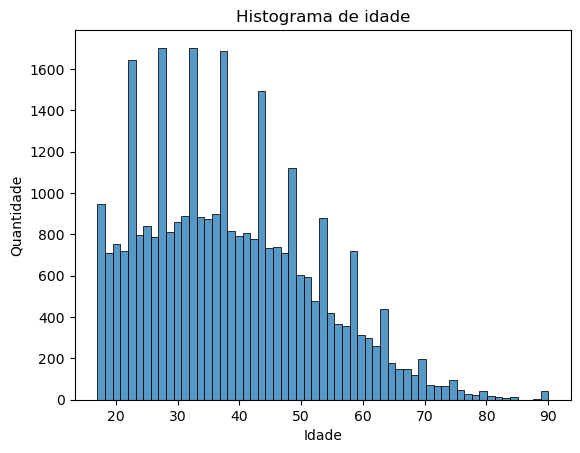

In [105]:
sns.histplot(x=df['age'])
plt.title('Histograma de idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade')

Text(0.5, 1.0, 'Histograma de renda')

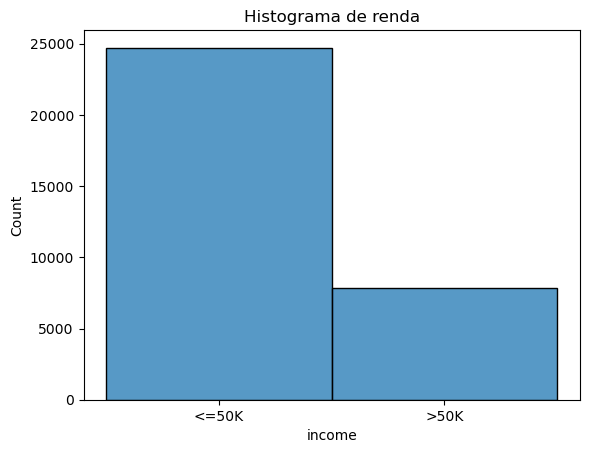

In [106]:
sns.histplot(x=df['income'])
plt.title('Histograma de renda')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Asian-Pac-Islander'),
  Text(3, 0, 'Amer-Indian-Eskimo'),
  Text(4, 0, 'Other')])

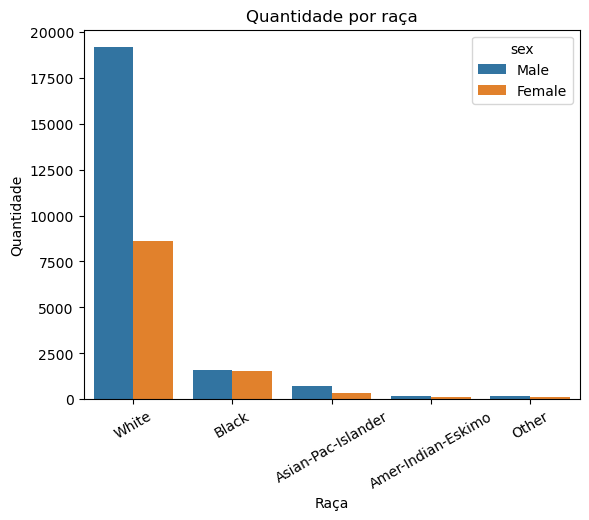

In [107]:
sns.countplot(data=df, x='race', hue='sex')
plt.title("Quantidade por raça")
plt.xlabel("Raça")
plt.ylabel("Quantidade")
plt.xticks(rotation=30) 

Text(0.5, 1.0, 'Histograma de classe de trabalho')

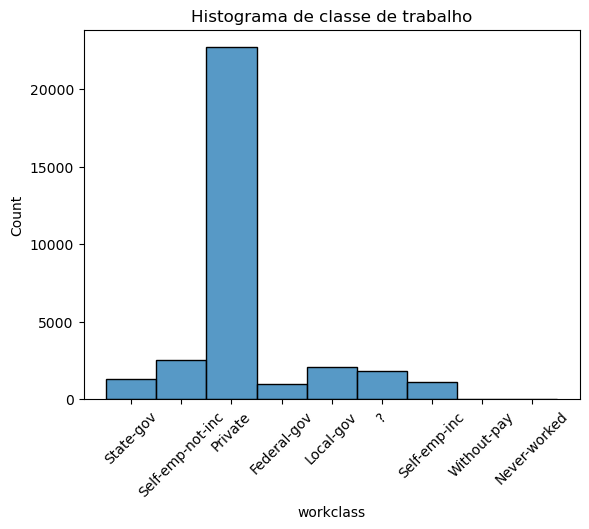

In [108]:
sns.histplot(x=df['workclass'])
plt.xticks(rotation=45)
plt.title('Histograma de classe de trabalho')

In [109]:
px.treemap(df, path=['workclass', 'age'])

In [110]:
px.parallel_categories(df, dimensions=['workclass','income'])

In [111]:
px.parallel_categories(df, dimensions=['occupation','workclass'])

Treinamento do modelo

In [112]:
#Dividindo entre atributos e classe
atributos = df.drop(['income'], axis=1)
classe = df['income']
atributos.head(5)

,age,workclass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,2174,0,40
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,0,0,40
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40


In [113]:
#Executando One-Hot Enconding
colunas_cat = ['workclass', 'marital-status', 'occupation', 'race', 'sex']
atributos = pd.get_dummies(data=atributos,columns=colunas_cat, dtype=int)
atributos.head(5)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,53,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,28,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [114]:
#Transformar em array
atributos_array = atributos.values
classe_array = classe.values

In [115]:
#Separar em treino e teste
x_train, x_test, y_train, y_test = train_test_split(atributos_array, classe_array, test_size=0.2, random_state=1, stratify=classe_array)

In [116]:
#Usar SMOTE para balancear os dados
smote = SMOTE(random_state=1)
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [139]:
#Treinar o modelo
modelo = RandomForestClassifier(random_state=1, n_estimators=200, max_depth=15, max_features=None, min_samples_leaf=5)
modelo.fit(x_smote, y_smote)

RandomForestClassifier(max_depth=15, max_features=None, min_samples_leaf=5,
                       n_estimators=200, random_state=1)

Visualizando o desempenho do modelo

In [140]:
#Gerar as previsões
previsoes = modelo.predict(x_test)

Text(0.5, 1.0, 'Matriz de confusão')

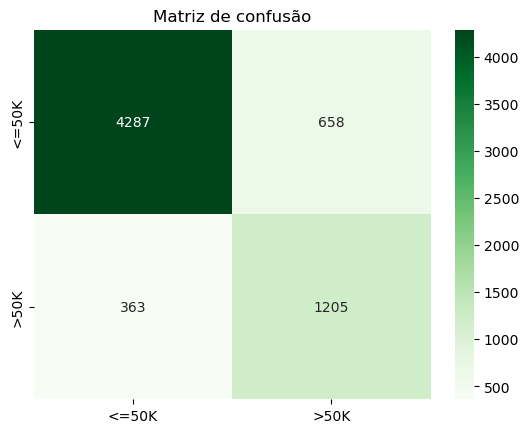

In [141]:
#Gerar matriz de confusão
confusao = confusion_matrix(y_test, previsoes)
#Plotar a matriz de confusão
unico = np.unique(classe_array)
sns.heatmap(data=confusao, cmap='Greens', annot=True, xticklabels=unico,yticklabels=unico, fmt='d')
plt.title('Matriz de confusão')

In [142]:
#Classification Report
report = classification_report(y_test, previsoes)
print(report)

              precision    recall  f1-score   support

       <=50K       0.92      0.87      0.89      4945
        >50K       0.65      0.77      0.70      1568

    accuracy                           0.84      6513
   macro avg       0.78      0.82      0.80      6513
weighted avg       0.86      0.84      0.85      6513



Diminuir a quantidade de atributos para treinar o modelo

In [144]:
#Verificar os atributos mais imporatantes do modelo
atributos_importancia = modelo.feature_importances_
atributos_importancia

array([6.69729650e-02, 1.33669687e-01, 1.23536088e-01, 1.94885060e-02,
       3.25164783e-02, 3.93303966e-03, 1.05209673e-03, 3.64195077e-03,
       0.00000000e+00, 7.11677401e-03, 1.69321287e-03, 1.52088657e-02,
       2.27839438e-03, 3.40174132e-05, 2.87647656e-02, 3.88256054e-04,
       3.62235434e-01, 2.13032817e-02, 3.41281605e-02, 1.98757824e-02,
       1.58037536e-02, 4.18561448e-03, 5.92646195e-03, 0.00000000e+00,
       9.57928876e-03, 2.63691673e-03, 6.15880309e-03, 6.97227230e-03,
       7.44419081e-03, 1.35343444e-02, 0.00000000e+00, 2.54944903e-03,
       4.21540330e-04, 6.75654652e-03, 2.28874805e-04, 7.81159395e-03,
       5.02782410e-05, 8.35460737e-04, 1.29200508e-03, 4.91704045e-05,
       2.20144790e-03, 1.99183852e-02, 7.80584618e-03])

In [145]:
#Criar um DF para melhor visualização
relevantes = pd.DataFrame({'atributo':atributos.columns,
                           'relevancia':atributos_importancia}).sort_values(by='relevancia', ascending=False)
relevantes.head(5)

,atributo,relevancia
16,marital-status_Married-civ-spouse,0.362235
1,education-num,0.133670
2,capital-gain,0.123536
0,age,0.066973
18,marital-status_Never-married,0.034128


Text(0.5, 1.0, '10 atributos mais relevantes')

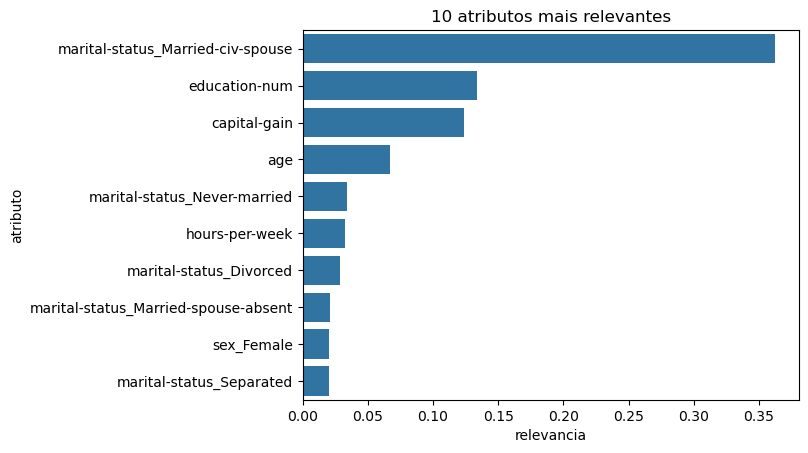

In [146]:
#Plotar um gráfico para melhor visualização dos 10 mais importantes
sns.barplot(data=relevantes.head(10),x='relevancia',y='atributo')
plt.title('10 atributos mais relevantes')

In [147]:
#Selecionando os atributos com importância maior que 0.001
atributos_relevantes = relevantes[relevantes['relevancia'] > 0.001]['atributo']
atributos_relevantes = atributos[atributos_relevantes]
atributos_relevantes_array = atributos_relevantes.values
atributos_relevantes[:5]

,marital-status_Married-civ-spouse,education-num,capital-gain,age,marital-status_Never-married,hours-per-week,marital-status_Divorced,marital-status_Married-spouse-absent,sex_Female,marital-status_Separated,...,occupation_?,workclass_?,workclass_Local-gov,occupation_Exec-managerial,occupation_Prof-specialty,workclass_State-gov,race_White,workclass_Self-emp-inc,race_Black,workclass_Federal-gov
0,0,13,2174,39,1,40,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,13,0,50,0,13,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,9,0,38,0,40,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,7,0,53,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,13,0,28,0,40,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


Treinar o modelo final

In [148]:
#Dividir em treino e teste
x_train_rel, x_test_rel, y_train_rel, y_test_rel = train_test_split(atributos_relevantes_array, classe_array, test_size=  0.2,random_state=1, stratify=classe_array)

In [149]:
#Usar SMOTE para balancear os dados de treino
smote_rel = SMOTE(random_state=1)
x_smote_rel, y_smote_rel = smote_rel.fit_resample(x_train_rel,y_train_rel)

In [150]:
#Treinar o modelo final
modelo_final = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=10, max_features='log2', min_samples_leaf=5)
modelo_final.fit(x_smote_rel, y_smote_rel)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=5,
                       random_state=1)

In [151]:
#Gerar as previsões finais
previsoes_final = modelo_final.predict(x_test_rel)

Visualizando o desempenho do modelo final

Text(0.5, 1.0, 'Matriz de confusão final')

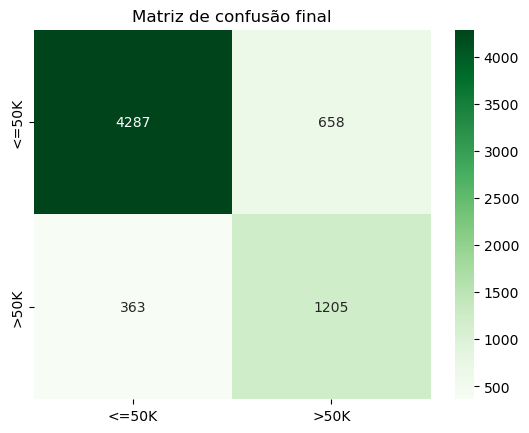

In [152]:
#Gerar matriz de confusão final
confusao_rel = confusion_matrix(y_test_rel, previsoes_final)
#Plotar a matriz de confusão final
unico = np.unique(classe_array)
sns.heatmap(data=confusao, cmap='Greens', annot=True, xticklabels=unico,yticklabels=unico, fmt='d')
plt.title('Matriz de confusão final')

In [153]:
#Classification Report final
report_final = classification_report(y_test_rel, previsoes_final)
print(report_final)

              precision    recall  f1-score   support

       <=50K       0.94      0.81      0.87      4945
        >50K       0.58      0.83      0.68      1568

    accuracy                           0.81      6513
   macro avg       0.76      0.82      0.78      6513
weighted avg       0.85      0.81      0.82      6513



Quando analisamos o desempenho dos dois modelos para prever os casos de renda >50K, percebemos um trade-off claro entre precision e recall. Apesar dos resultados de desempenho serem próximos ao do primeiro modelo, a versão final utiliza um conjunto muito menor de atributos, o que reduz o custo computacional e torna o modelo mais eficiente e adaptável para aplicação em DataSets maiores.

In [154]:
#Criar o .dot para visualizar a 1° árvore
export_graphviz(modelo_final.estimators_[0], out_file='tree.dot', feature_names=atributos_relevantes.columns, class_names=modelo.classes_.astype(str), rounded=True, filled=True, precision=2)